In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

Iris数据集是常用的分类实验数据集，由Fisher, 1936收集整理。Iris也称鸢尾花卉数据集，是一类多重变量分析的数据集。数据集包含150个数据样本，分为3类，每类50个数据，每个数据包含4个属性。可通过花萼长度，花萼宽度，花瓣长度，花瓣宽度4个属性预测鸢尾花卉属于（Setosa，Versicolour，Virginica）三个种类中的哪一类。

iris以鸢尾花的特征作为数据来源，常用在分类操作中。该数据集由3种不同类型的鸢尾花的各50个样本数据构成。其中的一个种类与另外两个种类是线性可分离的，后两个种类是非线性可分离的。
该数据集包含了4个属性：

- Sepal.Length（花萼长度），单位是cm;
- Sepal.Width（花萼宽度），单位是cm;
- Petal.Length（花瓣长度），单位是cm;
- Petal.Width（花瓣宽度），单位是cm;

种类：Iris Setosa（山鸢尾）、Iris Versicolour（杂色鸢尾），以及Iris Virginica（维吉尼亚鸢尾）。

In [56]:
# 加载数据
iris = load_iris()
# 将数据转换成DataFrame数据结构，这里的DataFrame是Pandas库里的数据结构
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df)
# 给df加上标签数据，标签[0,1,2]对应鸢尾花的三种分类
df['label'] = iris.target
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
     sepal length (cm)  sepal width (cm)

In [57]:
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]
print(df.label.value_counts())
print(df)

2    50
1    50
0    50
Name: label, dtype: int64
     sepal length  sepal width  petal length  petal width  label
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2

[150 rows x 5 columns]


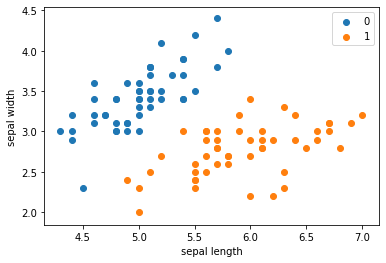

In [59]:
# 由于感知机是二分类算法，所以我们只取前两种鸢尾花的数据，并将数据可视化
# 特征也只取两种，sepal length, sepal width
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
# x轴为sepal length，y轴为sepal width
# 可以看出，我们只使用了两个特征
plt.xlabel('sepal length')
plt.ylabel('sepal width')
# 右上角就是legend
plt.legend()

两个特征的意思是：$x \rightarrow (x_0,x_1)$，在一元线性回归时，我们只有一个特征$x$

In [60]:
# iloc方法用来取出数据，这里取出了df的前一百行数据中的第0，1，-1列。-1表示倒数第一列。
# 然后数据类型转换为np.array类型
data = np.array(df.iloc[:100, [0, 1, -1]])
data

array([[5.1, 3.5, 0. ],
       [4.9, 3. , 0. ],
       [4.7, 3.2, 0. ],
       [4.6, 3.1, 0. ],
       [5. , 3.6, 0. ],
       [5.4, 3.9, 0. ],
       [4.6, 3.4, 0. ],
       [5. , 3.4, 0. ],
       [4.4, 2.9, 0. ],
       [4.9, 3.1, 0. ],
       [5.4, 3.7, 0. ],
       [4.8, 3.4, 0. ],
       [4.8, 3. , 0. ],
       [4.3, 3. , 0. ],
       [5.8, 4. , 0. ],
       [5.7, 4.4, 0. ],
       [5.4, 3.9, 0. ],
       [5.1, 3.5, 0. ],
       [5.7, 3.8, 0. ],
       [5.1, 3.8, 0. ],
       [5.4, 3.4, 0. ],
       [5.1, 3.7, 0. ],
       [4.6, 3.6, 0. ],
       [5.1, 3.3, 0. ],
       [4.8, 3.4, 0. ],
       [5. , 3. , 0. ],
       [5. , 3.4, 0. ],
       [5.2, 3.5, 0. ],
       [5.2, 3.4, 0. ],
       [4.7, 3.2, 0. ],
       [4.8, 3.1, 0. ],
       [5.4, 3.4, 0. ],
       [5.2, 4.1, 0. ],
       [5.5, 4.2, 0. ],
       [4.9, 3.1, 0. ],
       [5. , 3.2, 0. ],
       [5.5, 3.5, 0. ],
       [4.9, 3.6, 0. ],
       [4.4, 3. , 0. ],
       [5.1, 3.4, 0. ],
       [5. , 3.5, 0. ],
       [4.5, 2.3

In [61]:
# X为特征，:-1表示去掉最后一列，:表示所有数据
X, y = data[:,:-1], data[:,-1]

In [62]:
# 将分类0的ETL成分类为-1
# 列表推导式，list comprehension <- haskell
y = np.array([1 if i == 1 else -1 for i in y])

In [63]:
# 数据线性可分，二分类数据
# 此处为一元一次线性方程
class Model:
    # 类的构造函数，self相当于this
    def __init__(self):
        # w的初始值都为0
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)
        # b的初始值为0
        self.b = 0
        # 学习率或者步长为0.1
        self.l_rate = 0.1
        # self.data = data

    # sign函数定义
    def sign(self, x, w, b):
        # dot为向量间的点乘，x 点乘 w
        y = np.dot(x, w) + b
        return y

    # 随机梯度下降法，因为只根据误分类的点来更新，而不是所有样本点都更新，所以是随机梯度下降(SGD)
    def fit(self, X_train, y_train):
        # 是否误分类，初始化为正确分类
        is_wrong = False
        # 当样本点被误分类是
        while not is_wrong:
            # 误分类点的个数初始化为0
            wrong_count = 0
            # 遍历所有训练数据
            # d是索引，[0, len(X_train))
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                # 判断为真的话，表明训练数据点被误分类了
                if y * self.sign(X, self.w, self.b) <= 0:
                    # 参看教程的公式
                    self.w = self.w + self.l_rate * np.dot(y, X)
                    self.b = self.b + self.l_rate * y
                    # 误分类点数量加一
                    wrong_count += 1
            # 误分类点都被正确分类了，退出循环
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'

    def score(self):
        pass

In [65]:
# 实例化一个Model类
perceptron = Model()
# 训练感知机模型
perceptron.fit(X, y)

'Perceptron Model!'

由于我们的感知机模型为：

$$
f(x)=sign(wx+b),其中,sign(x)=
\begin{cases}
-1 & x < 0 \\
1 & x \ge 0
\end{cases}
$$

所以我们知道，数据点的分割线的公式为：

$$
wx+b=0 \\
w_0x_0+w_1x_1+b=0 \\
x_1 = -\frac{w_0x_0+b}{w_1}
$$

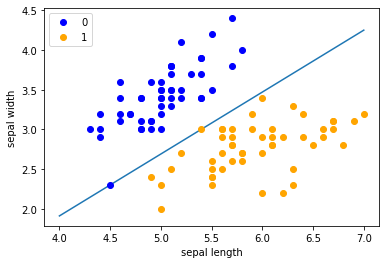

In [66]:
# 在指定的间隔内返回均匀间隔的数字
x_points = np.linspace(4, 7, 10)
# 翻译上一个单元格的公式
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_)

# 设定一些绘图属性
plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

### scikit-learn实例

In [67]:
from sklearn.linear_model import Perceptron

In [76]:
clf = Perceptron(fit_intercept=False, max_iter=1000, shuffle=False)
clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=False, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=False, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [77]:
# Weights assigned to the features.
# coef是系数的意思
print(clf.coef_)

[[ 16.3 -24.2]]


In [78]:
# 截距 Constants in decision function.
print(clf.intercept_)

[0.]


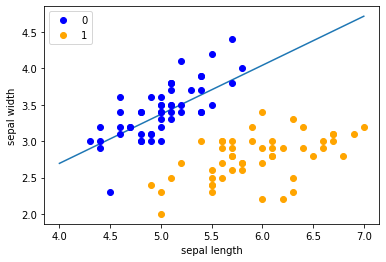

In [79]:
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()